In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\manis\Downloads\emotion_dataset.csv")

In [3]:
data.head()

,Emotion,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,neutral,Why ?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,joy,Sage Act upgrade on my to do list for tommorow.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,joy,Such an eye ! The true hazel eye-and so brill...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import re
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove leading and trailing whitespaces
    text = text.strip()
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Replace specific substrings
    text = text.replace('&quot;', '')
    text = text.replace('â€™', '')
    text = text.replace('&amp;', '')
    text = text.replace('â˜â˜¾', '')
    text = text.replace('~unk', '')
    text = text.replace('@', '')
    text = text.replace(':', '')
    text = text.replace('TVî€Œ', '')
    text = text.replace('&gt;', '')
    text = text.replace('&lt;', '')
    text = text.replace('/', '')
    text = text.replace('â€¦', '')
    
    return text


In [8]:
data['Text'] = data['Text'].apply(preprocess_text)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Text'])

In [10]:
# Assuming 'df' is your DataFrame
data = data.drop(data.columns[[2,3, 4,5,6,7,8,9]], axis=1)  

In [11]:
data

,Emotion,Text
0,neutral,why ?
1,joy,sage act upgrade on my to do list for tommorow.
2,sadness,on the way to my homegirl baby funeral!!! man ...
3,joy,such an eye ! the true hazel eye-and so brilli...
4,joy,iluvmiasantos ugh babe.. hugggzzz for u .! ba...
...,...,...
35044,sadness,my elderly friend's eyes seem to hold more sto...
35045,fear,it's as if my older neighbor's usual optimism ...
35046,anger,"sometimes, my senior friend's anger appears as..."
35047,sadness,here are times when my older loved one's face ...


In [12]:
data['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust', 'angry'], dtype=object)

In [13]:
depressed_emotions = ['sadness', 'angry','fear', 'anger', 'shame']

# Label each record as "depressed" or "not depressed"
data['depression_label'] = data['Emotion'].apply(lambda x: 'depressed' if any(Emotion in x for Emotion in depressed_emotions) else 'not depressed')

In [14]:
data


,Emotion,Text,depression_label
0,neutral,why ?,not depressed
1,joy,sage act upgrade on my to do list for tommorow.,not depressed
2,sadness,on the way to my homegirl baby funeral!!! man ...,depressed
3,joy,such an eye ! the true hazel eye-and so brilli...,not depressed
4,joy,iluvmiasantos ugh babe.. hugggzzz for u .! ba...,not depressed
...,...,...,...
35044,sadness,my elderly friend's eyes seem to hold more sto...,depressed
35045,fear,it's as if my older neighbor's usual optimism ...,depressed
35046,anger,"sometimes, my senior friend's anger appears as...",depressed
35047,sadness,here are times when my older loved one's face ...,depressed


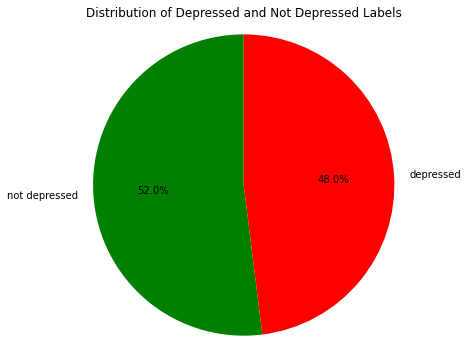

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

label_counts = data['depression_label'].value_counts()

# Create a pie chart to visualize the distribution with percentages
plt.figure(figsize=(6, 6))
colors = ['green', 'red']  # Define colors for the pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Depressed and Not Depressed Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


In [16]:
depressed_records=data[data['depression_label'] == 'depressed']
depressed_records

,Emotion,Text,depression_label
2,sadness,on the way to my homegirl baby funeral!!! man ...,depressed
5,fear,i'm expecting an extremely important phonecall...,depressed
6,sadness,.couldnt wait to see them live. if missing the...,depressed
10,anger,the bull tossed the effigy out of their hands ...,depressed
11,sadness,people hide their behind a #fake smile.,depressed
...,...,...,...
35044,sadness,my elderly friend's eyes seem to hold more sto...,depressed
35045,fear,it's as if my older neighbor's usual optimism ...,depressed
35046,anger,"sometimes, my senior friend's anger appears as...",depressed
35047,sadness,here are times when my older loved one's face ...,depressed


In [17]:
depressed_records.shape

(16832, 3)

In [18]:
depressed_records


,Emotion,Text,depression_label
2,sadness,on the way to my homegirl baby funeral!!! man ...,depressed
5,fear,i'm expecting an extremely important phonecall...,depressed
6,sadness,.couldnt wait to see them live. if missing the...,depressed
10,anger,the bull tossed the effigy out of their hands ...,depressed
11,sadness,people hide their behind a #fake smile.,depressed
...,...,...,...
35044,sadness,my elderly friend's eyes seem to hold more sto...,depressed
35045,fear,it's as if my older neighbor's usual optimism ...,depressed
35046,anger,"sometimes, my senior friend's anger appears as...",depressed
35047,sadness,here are times when my older loved one's face ...,depressed


In [19]:
#X_train, X_test, y_train, y_test = train_test_split(depressed_records['Text'], depressed_records['depression_label'], test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# Create a TF-IDF vectorizer
depressed_records['depression_level'] = 'low'  # Default to 'low'
depressed_records.loc[depressed_records['Emotion'] == 'fear', 'depression_level'] = 'medium'
depressed_records.loc[depressed_records['Emotion'] == 'anger', 'depression_level'] = 'high'
depressed_records.loc[depressed_records['Emotion'] == 'angry', 'depression_level'] = 'high'
# Step 2: Machine Learning Model (Multiclass Classification)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(depressed_records['Text'], depressed_records['depression_level'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes model for multiclass classification
ml_model = MultinomialNB()
ml_model.fit(X_train_tfidf, y_train)

# Make predictions for depression levels
ml_predictions = ml_model.predict(X_test_tfidf)

# Evaluate the machine learning model
ml_classification_report = classification_report(y_test, ml_predictions,output_dict=True)
print("Machine Learning Model Classification Report:")
print(ml_classification_report)

C:\Users\manis\AppData\Local\Temp\ipykernel_2676\3084306771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressed_records['depression_level'] = 'low'  # Default to 'low'


Machine Learning Model Classification Report:
{'high': {'precision': 0.8229755178907722, 'recall': 0.48936170212765956, 'f1-score': 0.6137640449438202, 'support': 893}, 'low': {'precision': 0.6290564153769346, 'recall': 0.9163636363636364, 'f1-score': 0.7460035523978685, 'support': 1375}, 'medium': {'precision': 0.8427370948379351, 'recall': 0.6387625113739763, 'f1-score': 0.7267080745341615, 'support': 1099}, 'accuracy': 0.7125037125037125, 'macro avg': {'precision': 0.7649230093685473, 'recall': 0.6814959499550909, 'f1-score': 0.6954918906252834, 'support': 3367}, 'weighted avg': {'precision': 0.7502339696604203, 'recall': 0.7125037125037125, 'f1-score': 0.7046327147594131, 'support': 3367}}


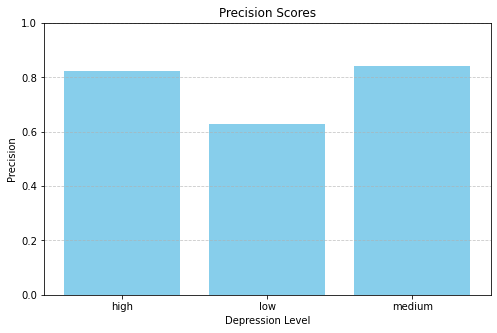

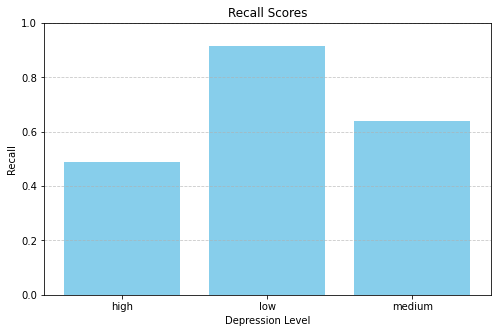

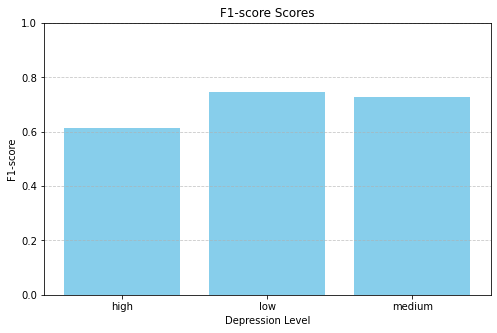

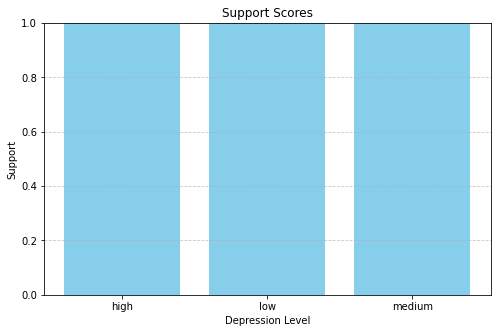

In [20]:
import matplotlib.pyplot as plt

def visualize_classification_report(report):
    labels = list(report.keys())[:-3]  # Extract depression levels ('High', 'Low', 'Medium')
    metrics = ['precision', 'recall', 'f1-score','support']  # Metrics to visualize

    for metric in metrics:
        scores = [report[label][metric] for label in labels]
        plt.figure(figsize=(8, 5))
        plt.bar(labels, scores, color='skyblue')
        plt.title(f'{metric.capitalize()} Scores')
        plt.xlabel('Depression Level')
        plt.ylabel(metric.capitalize())
        plt.ylim(0, 1)  # Set y-axis limit to 0-1
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Example usage:

ml_classification_report = {'high': {'precision': 0.8229755178907722, 'recall': 0.48936170212765956, 'f1-score': 0.6137640449438202, 'support': 893}, 'low': {'precision': 0.6290564153769346, 'recall': 0.9163636363636364, 'f1-score': 0.7460035523978685, 'support': 1375}, 'medium': {'precision': 0.8427370948379351, 'recall': 0.6387625113739763, 'f1-score': 0.7267080745341615, 'support': 1099}, 'accuracy': 0.7125037125037125, 'macro avg': {'precision': 0.7649230093685473, 'recall': 0.6814959499550909, 'f1-score': 0.6954918906252834, 'support': 3367}, 'weighted avg': {'precision': 0.7502339696604203, 'recall': 0.7125037125037125, 'f1-score': 0.7046327147594131, 'support': 3367}}
visualize_classification_report(ml_classification_report)

In [21]:
depressed_records

,Emotion,Text,depression_label,depression_level
2,sadness,on the way to my homegirl baby funeral!!! man ...,depressed,low
5,fear,i'm expecting an extremely important phonecall...,depressed,medium
6,sadness,.couldnt wait to see them live. if missing the...,depressed,low
10,anger,the bull tossed the effigy out of their hands ...,depressed,high
11,sadness,people hide their behind a #fake smile.,depressed,low
...,...,...,...,...
35044,sadness,my elderly friend's eyes seem to hold more sto...,depressed,low
35045,fear,it's as if my older neighbor's usual optimism ...,depressed,medium
35046,anger,"sometimes, my senior friend's anger appears as...",depressed,high
35047,sadness,here are times when my older loved one's face ...,depressed,low


In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report



# Define hyperparameters
max_sequence_length = 128
embedding_dim = 100
lstm_units = 64
dropout_rate = 0.5
batch_size = 64
epochs = 50

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Encode depression levels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_encoded = to_categorical(y_train_encoded, num_classes=3)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
model.add(Bidirectional(LSTM(lstm_units)))
model.add(Dropout(dropout_rate))
model.add(Dense(3, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Implement early stopping and learning rate reduction
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3)

# Train the model
history = model.fit(X_train_pad, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_class = np.argmax(y_pred, axis=1)

report = classification_report(y_test_encoded, y_pred_class, target_names=label_encoder.classes_,output_dict=True)
print(report)

Epoch 1/50
190/190 [==============================] - 152s 721ms/step - loss: 0.8846 - accuracy: 0.5774 - val_loss: 0.6697 - val_accuracy: 0.7053 - lr: 0.0010
Epoch 2/50
190/190 [==============================] - 138s 723ms/step - loss: 0.4489 - accuracy: 0.8312 - val_loss: 0.6282 - val_accuracy: 0.7476 - lr: 0.0010
Epoch 3/50
190/190 [==============================] - 134s 705ms/step - loss: 0.2525 - accuracy: 0.9143 - val_loss: 0.7160 - val_accuracy: 0.7491 - lr: 0.0010
Epoch 4/50
190/190 [==============================] - 134s 708ms/step - loss: 0.1519 - accuracy: 0.9511 - val_loss: 0.8451 - val_accuracy: 0.7290 - lr: 0.0010
Epoch 5/50
190/190 [==============================] - 135s 709ms/step - loss: 0.1225 - accuracy: 0.9629 - val_loss: 0.8934 - val_accuracy: 0.7394 - lr: 0.0010
Epoch 6/50
190/190 [==============================] - 136s 717ms/step - loss: 0.0656 - accuracy: 0.9828 - val_loss: 1.0282 - val_accuracy: 0.7454 - lr: 2.0000e-04
Epoch 7/50
106/106 [======================

In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import pickle

# Define hyperparameters
max_sequence_length = 128
embedding_dim = 100
lstm_units = 64
dropout_rate = 0.5
batch_size = 64
epochs = 50

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Encode depression levels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_encoded = to_categorical(y_train_encoded, num_classes=3)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
model.add(Bidirectional(LSTM(lstm_units)))
model.add(Dropout(dropout_rate))
model.add(Dense(3, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Implement early stopping and learning rate reduction
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3)

# Train the model
history = model.fit(X_train_pad, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_class = np.argmax(y_pred, axis=1)

report = classification_report(y_test_encoded, y_pred_class, target_names=label_encoder.classes_, output_dict=True)
print(report)

# Save the trained model
model.save('dl_emotion_model.h5')  # Replace 'your_model.h5' with the desired path to save the model

# Save the classification report dictionary to a pickle file
with open('dl_emotion_classification_report.pkl', 'wb') as f:
    pickle.dump(report, f)

print("Model and classification report saved.")


Epoch 1/50
190/190 [==============================] - 158s 750ms/step - loss: 0.8880 - accuracy: 0.5760 - val_loss: 0.6471 - val_accuracy: 0.7171 - lr: 0.0010
Epoch 2/50
190/190 [==============================] - 145s 766ms/step - loss: 0.4438 - accuracy: 0.8327 - val_loss: 0.6200 - val_accuracy: 0.7550 - lr: 0.0010
Epoch 3/50
190/190 [==============================] - 147s 772ms/step - loss: 0.2406 - accuracy: 0.9197 - val_loss: 0.7266 - val_accuracy: 0.7558 - lr: 0.0010
Epoch 4/50
190/190 [==============================] - 140s 736ms/step - loss: 0.1424 - accuracy: 0.9552 - val_loss: 0.8336 - val_accuracy: 0.7320 - lr: 0.0010
Epoch 5/50
190/190 [==============================] - 140s 736ms/step - loss: 0.1053 - accuracy: 0.9677 - val_loss: 0.9159 - val_accuracy: 0.7372 - lr: 0.0010
Epoch 6/50
190/190 [==============================] - 140s 735ms/step - loss: 0.0565 - accuracy: 0.9869 - val_loss: 1.0861 - val_accuracy: 0.7313 - lr: 2.0000e-04
Epoch 7/50
106/106 [======================

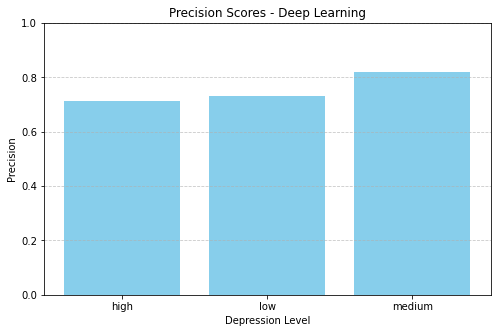

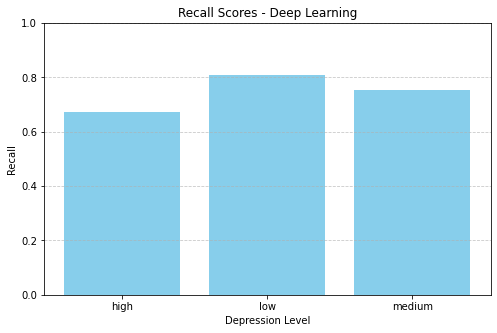

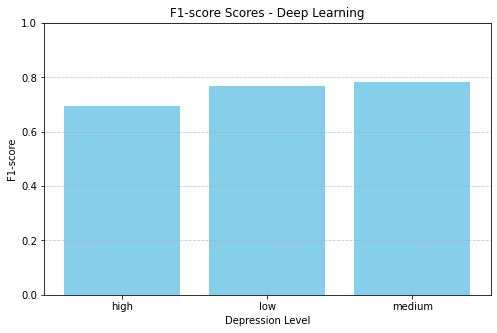

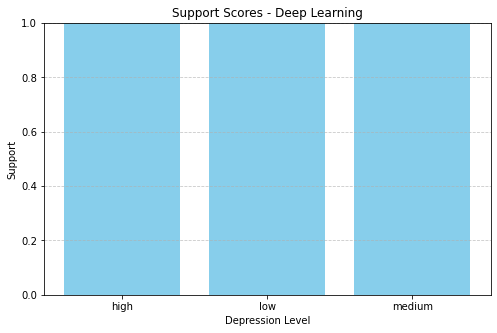

In [24]:
import matplotlib.pyplot as plt

def visualize_classification_report(report):
    labels = ['high', 'low', 'medium']  # Depression levels
    metrics = ['precision', 'recall', 'f1-score','support']  # Metrics to visualize

    for metric in metrics:
        scores_dl = [report[label][metric] for label in labels]
        plt.figure(figsize=(8, 5))
        plt.bar(labels, scores_dl, color='skyblue')
        plt.title(f'{metric.capitalize()} Scores - Deep Learning')
        plt.xlabel('Depression Level')
        plt.ylabel(metric.capitalize())
        plt.ylim(0, 1)  # Set y-axis limit to 0-1
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Example usage:
dl_classification_report = {'high': {'precision': 0.7146254458977408, 'recall': 0.6730123180291153, 'f1-score': 0.6931949250288351, 'support': 893}, 'low': {'precision': 0.7323665128543178, 'recall': 0.808, 'f1-score': 0.7683264177040111, 'support': 1375}, 'medium': {'precision': 0.819623389494549, 'recall': 0.7525022747952684, 'f1-score': 0.7846299810246679, 'support': 1099}, 'accuracy': 0.754083754083754, 'macro avg': {'precision': 0.7555384494155358, 'recall': 0.7445048642747946, 'f1-score': 0.7487171079191713, 'support': 3367}, 'weighted avg': {'precision': 0.7561421394166553, 'recall': 0.754083754083754, 'f1-score': 0.7537214854588282, 'support': 3367}}

visualize_classification_report(dl_classification_report)


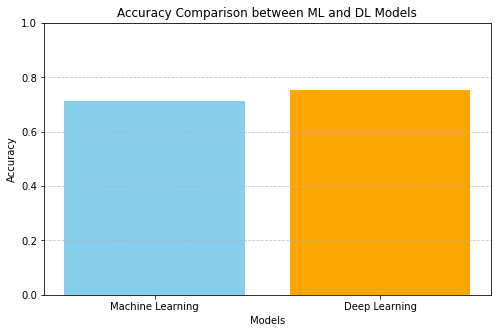

In [25]:
import matplotlib.pyplot as plt

def compare_accuracies(ml_accuracy, dl_accuracy):
    models = ['Machine Learning', 'Deep Learning']
    accuracies = [ml_accuracy, dl_accuracy]

    plt.figure(figsize=(8, 5))
    plt.bar(models, accuracies, color=['skyblue', 'orange'])
    plt.title('Accuracy Comparison between ML and DL Models')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set y-axis limit to 0-1
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example usage:
ml_accuracy = 0.7125037125037125  # Provide ML model accuracy
dl_accuracy = 0.754083754083754  # Provide DL model accuracy

compare_accuracies(ml_accuracy, dl_accuracy)

In [40]:
import pandas as pd
from textblob import TextBlob

# Assuming your dataset has a 'text' column that contains the text data
records = depressed_records['Text']

# Initialize a list to store depression levels
depression_levels = []

# Analyze text data and classify into "Low," "Medium," or "High" depression levels
for record in records:
    # Analyze sentiment using TextBlob (you can use other NLP libraries)
    text_blob = TextBlob(record)
    sentiment_score = text_blob.sentiment.polarity
    
    # Classify text into depression levels based on sentiment score (customize this part)
    if sentiment_score <= -0.2:
        depression_level = "High"
    elif sentiment_score > -0.2 and sentiment_score < 0.2:
        depression_level = "Medium"
    else:
        depression_level = "Low"
    
    depression_levels.append(depression_level)

# Add the depression level column to your dataset
depressed_records['depression_level'] = depression_levels

depression_class_dataset=depressed_records.copy()

# Optionally, you can save or export the dataset with the depression level classification
depression_class_dataset.to_csv('dataset_with_depression_levels.csv', index=False)



C:\Users\manis\AppData\Local\Temp\ipykernel_4020\3852599984.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressed_records['depression_level'] = depression_levels


In [41]:
depressed_records

,Emotion,Text,depression_label,depression_level
2,sadness,on the way to my homegirl baby funeral!!! man ...,depressed,High
5,fear,i'm expecting an extremely important phonecall...,depressed,Low
6,sadness,.couldnt wait to see them live. if missing the...,depressed,Medium
10,anger,the bull tossed the effigy out of their hands ...,depressed,Low
11,sadness,people hide their behind a #fake smile.,depressed,High
...,...,...,...,...
35044,sadness,my elderly friend's eyes seem to hold more sto...,depressed,Low
35045,fear,it's as if my older neighbor's usual optimism ...,depressed,Medium
35046,anger,"sometimes, my senior friend's anger appears as...",depressed,High
35047,sadness,here are times when my older loved one's face ...,depressed,Low


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [37]:
max_sequence_length = 128  # You can adjust this based on your data

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Encode depression levels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_encoded = to_categorical(y_train_encoded, num_classes=3)  # num_classes is the number of depression levels

In [38]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # num_classes is the number of depression levels

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64)

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_class = np.argmax(y_pred, axis=1)

report = classification_report(y_test_encoded, y_pred_class, target_names=label_encoder.classes_)
print(report)

Epoch 1/10
208/208 [==============================] - 83s 356ms/step - loss: 0.8608 - accuracy: 0.5903
Epoch 2/10
208/208 [==============================] - 72s 344ms/step - loss: 0.4394 - accuracy: 0.8321
Epoch 3/10
208/208 [==============================] - 74s 357ms/step - loss: 0.2537 - accuracy: 0.9087
Epoch 4/10
208/208 [==============================] - 74s 355ms/step - loss: 0.1614 - accuracy: 0.9454
Epoch 5/10
208/208 [==============================] - 71s 342ms/step - loss: 0.1104 - accuracy: 0.9633
Epoch 6/10
208/208 [==============================] - 71s 342ms/step - loss: 0.0761 - accuracy: 0.9748
Epoch 7/10
208/208 [==============================] - 72s 348ms/step - loss: 0.0665 - accuracy: 0.9784
Epoch 8/10
208/208 [==============================] - 72s 348ms/step - loss: 0.0566 - accuracy: 0.9804
Epoch 9/10
208/208 [==============================] - 72s 348ms/step - loss: 0.0458 - accuracy: 0.9852
Epoch 10/10
104/104 [==============================] - 9s 67ms/step
     